In [1]:
import warnings
warnings.filterwarnings('ignore')

from honest_ml.trainer import RegressionTrainer, ClassificationTrainer, EvaluateModel
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

clf = LogisticRegression()
X, y = make_classification(
    n_samples=2000,  n_features=100,
    n_informative=90, n_redundant=2,
    random_state=0
)
X = pd.DataFrame(X)
y = pd.Series(y)
num_trials = 200

clf_eval = EvaluateModel("classification", clf, X, y, num_trials)
model_instances = clf_eval.fit_random("random")

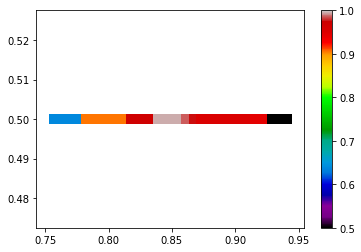

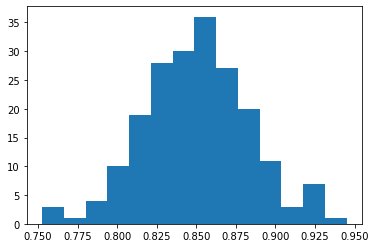

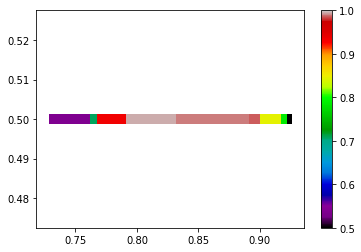

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.5, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments



fig, ax = plt.subplots()

z = np.linspace(0, 1, len(color_index))
constant = [0.5 for _ in range(len(color_index))]
cl = colorline(class_zero_precision, constant, z, cmap=plt.get_cmap('nipy_spectral'), linewidth=10)
ax.autoscale_view()
cb = plt.colorbar(cl)
cb.ax.yaxis.set_tick_params(labelright=True)
plt.show()
plt.hist(class_zero_precision, bins='auto')

fig, ax = plt.subplots()
cl = colorline(class_one_precision, constant, z, cmap=plt.get_cmap('nipy_spectral'), linewidth=10)
ax.autoscale_view()
cb = plt.colorbar(cl)
cb.ax.yaxis.set_tick_params(labelright=True)
plt.show()

# tab20b


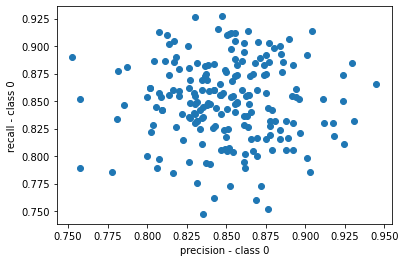

In [39]:
class_zero_precision = []
class_zero_recall = []
class_one_precision = []
class_one_recall = []
color_index = []
for index, m in enumerate(model_instances):
    class_zero_precision.append(m['0']["precision"])
    class_zero_recall.append(m['0']["recall"])
    color_index.append(index)
    class_one_precision.append(m['1']["precision"])
    class_one_recall.append(m['1']["recall"])
    
fig, ax = plt.subplots()
plt.scatter(class_zero_precision, class_zero_recall)
plt.xlabel('precision - class 0')
plt.ylabel('recall - class 0')
ax.autoscale_view()
plt.show()

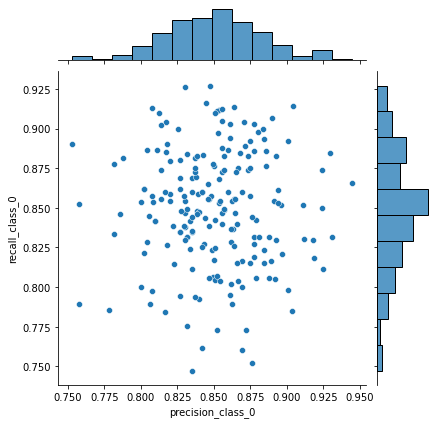

In [41]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame()
data["precision_class_0"] = class_zero_precision
data["recall_class_0"] = class_zero_recall
sns.jointplot(data=data, x="precision_class_0", y="recall_class_0")